In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# xlsx = pd.ExcelFile('./Data/book1cut.xlsx')

xlsx = pd.ExcelFile('./Data/Outlier_thresh1_50.xlsx')
df5 = pd.read_excel(xlsx, '1S 5X')
dataset5= df5.copy()
df4 = pd.read_excel(xlsx, '1S 4X')
dataset4= df4.copy()
df3 = pd.read_excel(xlsx, '1S 3X')
dataset3= df3.copy()
df2 = pd.read_excel(xlsx, '1S 2X')
dataset2= df2.copy()
df1 = pd.read_excel(xlsx, '1S 1X')
dataset1= df1.copy()



In [3]:
dataset1
# dataset.tail()

# help(dataset)

,DEPTH,CALI,GR,ILD,ITT,LLD,LLS,MSFL,NPHI,RHOB,SFL,SP
0,1524.0000,14.35840,54.8415,0.9607,0.1233,1.0149,1.0776,1.4853,0.4159,2.24710,1.2134,40.6607
1,1524.1524,14.08870,55.8918,0.9660,0.1231,0.9986,1.0821,1.5206,0.4255,2.25870,1.1890,39.9817
2,1524.3048,13.81900,57.2492,0.9624,0.1238,0.9823,1.0876,1.4323,0.4351,2.25890,1.1610,39.3027
3,1524.4572,13.73630,58.0199,0.9399,0.1252,0.9660,1.0079,1.3148,0.4352,2.25460,1.1243,38.6237
4,1524.6096,13.87160,58.2939,0.9146,0.1256,0.9360,1.0188,1.2740,0.4353,2.25150,1.0922,38.2129
...,...,...,...,...,...,...,...,...,...,...,...,...
13852,3635.0448,9.00074,115.5579,2.1824,0.0854,2.1704,2.5690,3.1694,0.2211,2.52625,2.6407,11.5939
13853,3635.1972,9.00007,115.3115,2.2141,0.0859,2.1827,2.5769,2.8899,0.2179,2.52590,2.6294,10.5358
13854,3635.3496,8.99940,114.8351,2.2159,0.0865,2.1733,2.5695,2.6104,0.2147,2.52555,2.6371,10.2207
13855,3635.5020,8.98880,115.0071,2.1779,0.0863,2.1579,2.5616,2.3309,0.2115,2.52520,2.6507,10.0463


In [5]:
dataset1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13857 entries, 0 to 13856
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   DEPTH   13857 non-null  float64
 1   CALI    13857 non-null  float64
 2   GR      13857 non-null  float64
 3   ILD     13857 non-null  float64
 4   ITT     13857 non-null  float64
 5   LLD     13857 non-null  float64
 6   LLS     13857 non-null  float64
 7   MSFL    13857 non-null  float64
 8   NPHI    13857 non-null  float64
 9   RHOB    13857 non-null  float64
 10  SFL     13857 non-null  float64
 11  SP      13857 non-null  float64
dtypes: float64(12)
memory usage: 1.3 MB


In [ ]:
# # choose column name from row
# dataset.columns=dataset.iloc[2]
# dataset.columns
# units=dataset.iloc[4]

In [ ]:
# # dropped empty rows
# dataset1=dataset.drop([0,1,2,3,4,5] ,axis=0)
# dataset1

In [4]:
column_names= ['DEPTH', 'CALI','GR', 'ILD', 'ITT', 'LLD', 'LLS', 'MSFL','NPHI', 'RHOB', 'SFL', 'SP']

In [ ]:

# dataset1['CILD']

In [ ]:
# pairplots
sns.pairplot(dataset1[column_names], diag_kind='hist')

In [ ]:
sns.pairplot(dataset1[column_names], diag_kind='kde')


# //error may be because data contains strings somewhere/ prop NAN value / let's investigate

# Preprocessing

## Clean the data

 I prefer matlab for data cleaning<br>
using ugly data app makes it way easier

In [ ]:
#check null values
# dataset1.isnull().sum()    #missing values
dataset1.isna().sum()

In [ ]:
#if so Drop those rows to keep this initial tutorial simple.

dataset1 = dataset1.dropna()

#then confirm drop
dataset1.isna().sum()

# help(dataset.sample)

In [ ]:
#imputing missing values using Iputer in sklearn.preprocessing

from sklearn.preprocessing import Imputer

# for my data missing data is represented as -999.25
imp= Imputer(missing_values="NAN", stategy= "median", axis=0)
imp.fit(X)
X= pd.DataFrame(data=imp.transform(X), columns = X.columns)

# visualize data

<function matplotlib.pyplot.show(close=None, block=None)>

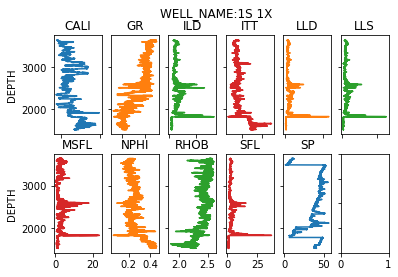

In [5]:
def plot_data(dataset1, well_name):
    
    
    fig, axs = plt.subplots(2, 6)
    fig.suptitle('WELL_NAME:'+ well_name)
    axs[0, 0].plot(dataset1['CALI'],dataset1['DEPTH'] )
    axs[0, 0].set_title('CALI')
    axs[0, 1].plot(dataset1['GR'],dataset1['DEPTH'], 'tab:orange')
    axs[0, 1].set_title('GR')
    axs[0, 2].plot(dataset1['ILD'],dataset1['DEPTH'], 'tab:green')
    axs[0, 2].set_title('ILD')
    axs[0, 3].plot(dataset1['ITT'],dataset1['DEPTH'], 'tab:red')
    axs[0, 3].set_title('ITT')
    axs[0, 4].plot(dataset1['LLD'],dataset1['DEPTH'], 'tab:orange')
    axs[0, 4].set_title('LLD')
    axs[0, 5].plot(dataset1['LLS'],dataset1['DEPTH'], 'tab:green')
    axs[0, 5].set_title('LLS')
    axs[1, 0].plot(dataset1['MSFL'],dataset1['DEPTH'], 'tab:red')
    axs[1, 0].set_title('MSFL')
    axs[1, 1].plot(dataset1['NPHI'],dataset1['DEPTH'], 'tab:orange')
    axs[1, 1].set_title('NPHI')
    axs[1, 2].plot(dataset1['RHOB'],dataset1['DEPTH'], 'tab:green')
    axs[1, 2].set_title('RHOB')
    axs[1, 3].plot(dataset1['SFL'],dataset1['DEPTH'], 'tab:red')
    axs[1, 3].set_title('SFL')
    axs[1, 4].plot(dataset1['SP'],dataset1['DEPTH'], 'tab:blue')
    axs[1, 4].set_title('SP')

    for ax in axs.flat:
        ax.set( ylabel='DEPTH')

    # Hide x labels and tick labels for top plots and y ticks for right plots.
    for ax in axs.flat:
        ax.label_outer()
    
    return plt.show
plot_data(dataset1, '1S 1X')

<function matplotlib.pyplot.show(close=None, block=None)>

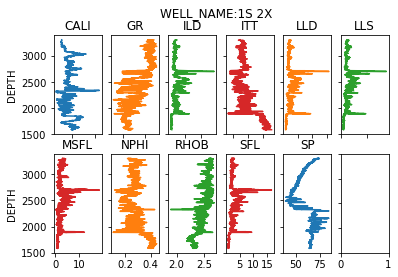

In [6]:
plot_data(dataset2,'1S 2X')

<function matplotlib.pyplot.show(close=None, block=None)>

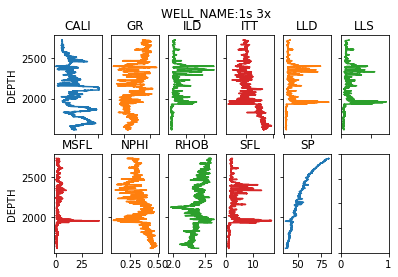

In [7]:
plot_data(dataset3,'1s 3x')

<function matplotlib.pyplot.show(close=None, block=None)>

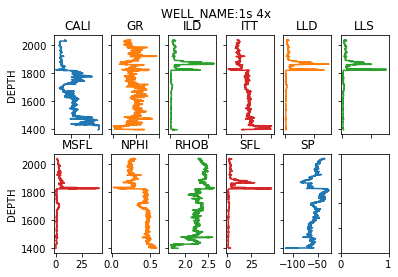

In [8]:
plot_data(dataset4,'1s 4x')

# Outlier detections
* Tukey IQR
* kernel density estimation

In [ ]:
from IPython.display import Image
Image(filename='./images/tukeyiqr.jpg')

In [ ]:
## Tukey IQR
#### Q1-1.5(Q3-Q1) or above Q3 +1.5(Q3-Q1)


def find_outliers_tukey(x):
    q1 = np.percentile(x, 25)
    q3 = np.percentile(x, 75)
    iqr = q3-q1 
    floor = q1 - 1.5*iqr
    ceiling = q3 + 1.5*iqr
    outlier_indices = list(x.index[(x < floor)|(x > ceiling)])
    outlier_values = list(x[outlier_indices])

    return outlier_indices, outlier_values

tukey_indices, tukey_values = find_outliers_tukey(dataset1['RHOB'])
print(np.sort(tukey_values))

print(tukey_indices)

In [ ]:
# kernel Density Estimation
from sklearn.preprocessing import scale
from statsmodels.nonparametric.kde import KDEUnivariate

def find_outliers_kde(x):
    x_scaled = scale(list(map(float, x)))
    kde = KDEUnivariate(x_scaled)
    kde.fit(bw="scott", fft=True)
    pred = kde.evaluate(x_scaled)
    
    n = sum(pred < 0.05)
    outlier_ind = np.asarray(pred).argsort()[:n]
    outlier_value = np.asarray(x)[outlier_ind]

    return outlier_ind, outlier_value

kde_indices, kde_values = find_outliers_kde(dataset1['RHOB'])
print(np.sort(kde_values) )

print(kde_indices)

In [ ]:
# Distribution of Features


In [ ]:
# know the type of classes present in eature, if classifier
dataset1['RHOB'].unique()

## standardise data

In [7]:
#     using mean of each feature
from sklearn.preprocessing import StandardScaler
scaler1 = StandardScaler()
Sd_scaler1=scaler1.fit(dataset1)
data1_Sd= Sd_scaler1.transform(dataset1)
print(data1_Sd)

[[-1.73192582  0.92328989 -1.24778008 ... -1.52040625 -0.81974287
   0.2471976 ]
 [-1.73167583  0.79296935 -1.20528985 ... -1.41882247 -0.83080071
   0.19688167]
 [-1.73142584  0.66264882 -1.1503758  ... -1.41707103 -0.84349003
   0.14656574]
 ...
 [ 1.73142584 -1.66620868  1.17928032 ...  0.91804219 -0.17453623
  -2.00849727]
 [ 1.73167583 -1.67133066  1.18623864 ...  0.91497716 -0.16837285
  -2.02142083]
 [ 1.73192582 -1.66857639  1.24497167 ...  0.98415921 -0.16488329
  -2.06777966]]


In [13]:
# using minmax
# places each feature between 1 and 0
from sklearn.preprocessing import MinMaxScaler

scaler2=MinMaxScaler()
MM_scaler1=scaler2.fit(dataset1)
data1_MM=MM_scaler1.transform(dataset1)
print(data1_MM)

[[0.00000000e+00 5.08575991e-01 2.58757907e-01 ... 5.17492711e-01
  1.32575495e-02 7.10906273e-01]
 [7.21709007e-05 4.84382008e-01 2.69545007e-01 ... 5.32865094e-01
  1.25813702e-02 6.98541958e-01]
 [1.44341801e-04 4.60188026e-01 2.83486175e-01 ... 5.33130135e-01
  1.18054266e-02 6.86177642e-01]
 ...
 [9.99855658e-01 2.78360873e-02 8.74921816e-01 ... 8.86496157e-01
  5.27115070e-02 1.56606168e-01]
 [9.99927829e-01 2.68851930e-02 8.76688341e-01 ... 8.86032335e-01
  5.30883938e-02 1.53430415e-01]
 [1.00000000e+00 2.73965230e-02 8.91599044e-01 ... 8.96501458e-01
  5.33017783e-02 1.42038491e-01]]


In [8]:
# convert standardized(numpy) datatype to pandas dataframe
pd_data1_Sd= pd.DataFrame(data1_Sd, columns=dataset1.keys())
# print(pd_data1_Sd)

# pd_data1_MM=pd.DataFrame(data1_MM, columns= dataset1.keys())
# print(pd_data1_MM)

pd_data1_Sd

,DEPTH,CALI,GR,ILD,ITT,LLD,LLS,MSFL,NPHI,RHOB,SFL,SP
0,-1.731926,0.923290,-1.247780,-1.023788,1.899557,-0.840172,-0.884799,-0.535242,2.477265,-1.520406,-0.819743,0.247198
1,-1.731676,0.792969,-1.205290,-1.020444,1.886061,-0.848950,-0.882571,-0.518380,2.625055,-1.418822,-0.830801,0.196882
2,-1.731426,0.662649,-1.150376,-1.022715,1.933295,-0.857729,-0.879849,-0.560559,2.772844,-1.417071,-0.843490,0.146566
3,-1.731176,0.622688,-1.119197,-1.036910,2.027763,-0.866508,-0.919305,-0.616686,2.774384,-1.454727,-0.860122,0.096250
4,-1.730926,0.688065,-1.108112,-1.052872,2.054754,-0.882665,-0.913909,-0.636175,2.775923,-1.481874,-0.874670,0.065808
...,...,...,...,...,...,...,...,...,...,...,...,...
13852,1.730926,-1.665561,1.208521,-0.253019,-0.657824,-0.217851,-0.146462,0.269210,-0.521630,0.924172,-0.172905,-1.906739
13853,1.731176,-1.665885,1.198553,-0.233020,-0.624085,-0.211226,-0.142551,0.135700,-0.570893,0.921107,-0.178026,-1.985147
13854,1.731426,-1.666209,1.179280,-0.231884,-0.583599,-0.216289,-0.146214,0.002190,-0.620157,0.918042,-0.174536,-2.008497
13855,1.731676,-1.671331,1.186239,-0.255859,-0.597094,-0.224583,-0.150125,-0.131320,-0.669420,0.914977,-0.168373,-2.021421


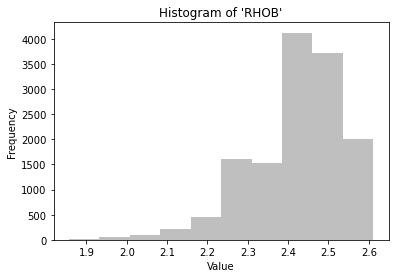

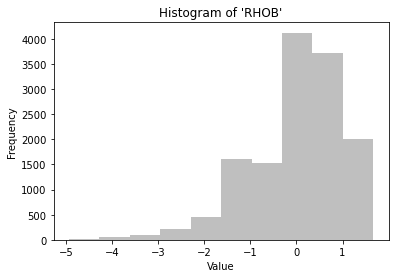

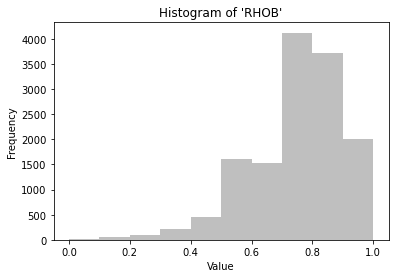

In [15]:
# Use pyplot in matplotlib to plot histograms
%matplotlib inline
import matplotlib.pyplot as plt

def plot_histogram(x):
    plt.hist(x, color='gray', alpha=0.5)
    plt.title("Histogram of '{var_name}'".format(var_name=x.name))
    plt.xlabel("Value")
    plt.ylabel("Frequency")
    plt.show()
    
    
plot_histogram(dataset1['RHOB'])
plot_histogram(pd_data1_Sd['RHOB'])
plot_histogram(pd_data1_MM['RHOB'])

In [ ]:
# Plot histograms to show distribution of features by outcome categories

def plot_histogram_dv(x,y):
#     plt.hist(list(x[y==0]), alpha=0.5, label='Outcome=0')
#     plt.hist(list(x[y==1]), alpha=0.5, label='Outcome=1')
    
    plt.hist(x, color='gray', alpha=0.5, label='independent')
    plt.hist(y, color='blue', alpha=0.5, label='dependent')
    plt.title("Histogram of '{var_name}' by Outcome Category".format(var_name=x.name))
    plt.xlabel("Value")
    plt.ylabel("Frequency")
    plt.legend(loc='upper right')
    plt.show()


    
plot_histogram_dv(pd_data1_Sd['NPHI'],pd_data1_Sd['RHOB'])

#expectation failed, expected a supperimposition
# try standerdizing first so that they can overlap
#use sklearn for standardizing

# Feature engineering


# A.	Filter methods
<h2>Filter features by variance</h2>
the more the variance the better it is for prediction; 
the low variance: does not really change much in thier values/ they're pretty much the same/ so close to zero ; so unlikely they are good predictors

In [18]:
dataset1.var()

# pd_data1_Sd.var()

DEPTH    371670.816657
CALI          4.283192
GR          611.054603
ILD           2.512539
ITT           0.000220
LLD           3.447804
LLS           4.080466
MSFL          4.382950
NPHI          0.004220
RHOB          0.013041
SFL           4.869346
SP          182.120962
dtype: float64

In [ ]:
# drop insignificant varriations 
dataset1_vardrop= dataset1.drop(columns = ['ITT'])

In [ ]:
print('original shape is '+ str(dataset1.shape))

print('the new shape is ' + str(dataset1_vardrop.shape))

## Filter features by correlation

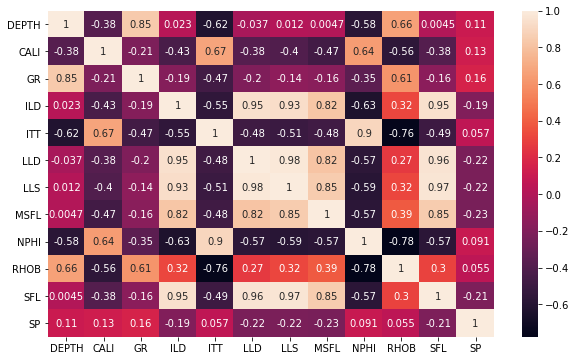

In [19]:
import seaborn as sn
import matplotlib.pyplot as plt

fig_dims = (10,6)
fig, ax = plt.subplots(figsize = fig_dims)
sn.heatmap(dataset1.corr(),ax=ax ,annot=True,
          )
plt.show()

In [ ]:
abs(dataset1.corr())

In [20]:
# abs(dataset1.corr()['NPHI'][abs(dataset1.corr()['NPHI'])>0.5])

abs(dataset1.corr()['RHOB'][abs(dataset1.corr()['RHOB'])>0.5])

DEPTH    0.661068
CALI     0.556758
GR       0.607833
ITT      0.758000
NPHI     0.777646
RHOB     1.000000
Name: RHOB, dtype: float64

In [21]:
# so i want to drop every feature that has a correlation <0.5 against RHOB

# keep everything that has a correlation of alt least 0.5

drop_lowCor=abs(dataset1.corr()['RHOB'][abs(dataset1.corr()['RHOB'])>0.5].drop('RHOB')).index.tolist()
drop_lowCor


['DEPTH', 'CALI', 'GR', 'ITT', 'NPHI']

In [ ]:
# an iteration to determine which correlation rate provides best R2 squared value




vals = [0.1,0.2,0.3,0.4,0.5,0.6,0.7]
for val in vals:
    features =abs(dataset1.corr()['RHOB'][abs(dataset1.corr()['RHOB'])>val].drop('RHOB')).index.tolist()
    
    X = dataset1.drop(columns='RHOB')
    y=dataset1['RHOB']
    X=X[features]
    
    print(features)

    y_pred = cross_val_predict(classifier_pipeline, X, y, cv=cv)
    print("RMSE: " + str(round(sqrt(mean_squared_error(y,y_pred)),2)))
    print("R_squared: " + str(round(r2_score(y,y_pred),2)))


### Feature importance
Feature importance gives you a score for each feature of your data, the higher the score more important or relevant is the feature towards your output variable.

In [ ]:
# an inbuilt class that comes with Tree Based Classifiers, we will be using Extra Tree Classifier for extracting the top 10 features for the dataset

from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
FI_x= dataset1.copy()
FI_y= FI_x.pop('RHOB')
FI_model = ExtraTreesClassifier()
FI_model.fit(FI_x,FI_y)


In [ ]:
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers

In [ ]:
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

### Univariate Selection
Statistical tests can be used to select those features that have the strongest relationship with the output variable.
The example below uses the chi-squared (chi²) statistical test for non-negative features to select 10 of the best features

#####  Using Chi-Square
Chi-square test — Chi-square method (X2) is generally used to test the relationship between categorical variables. It compares the observed values from different attributes of the dataset to its expected value.

chi-square test measures dependence between stochastic variables, so using this function “weeds out” the features that are the most likely to be independent of class and therefore irrelevant for classification.

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

Chi_x = dataset1.copy()
Chi_y = Chi_x.pop('RHOB')

# Chi_x = Chi_x.to_numpy()
# Chi_y = Chi_y.to_numpy()

#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k=4)
fit = bestfeatures.fit(Chi_x,Chi_y)

In [ ]:
dataset1

In [ ]:
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

In [ ]:
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
featureScores

In [ ]:
print(featureScores.nlargest(10,'Score'))  #print 10 best features

# Information gain - mutual information In Regression
Mutual Information
Estimate mutual information for a continuous target variable.
Mutual information (MI) between two random variables is a non-negative value, which measures the dependency between the variables. It is equal to zero if and only if two random variables are independent, and higher values mean higher dependency.
The function relies on nonparametric methods based on entropy estimation from k-nearest neighbors distances.
measures the reduction in uncertainty for one variable given a known value of the other variable.

Inshort

A quantity called mutual information measures the amount of information one can obtain from one random variable given another.

I(X ; Y) = H(X) – H(X | Y) Where I(X ; Y) is the mutual information for X and Y, H(X) is the entropy for X and H(X | Y) is the conditional entropy for X given Y. The result has the units of bits.

In [24]:
mutual_info = mutual_info_regression(pd_data1_Sd.drop('RHOB'), pd_data1_Sd['RHOB'])

NameError: name 'mutual_info_regression' is not defined

In [25]:
from sklearn.feature_selection import mutual_info_regression
# determine the mutual information
mutual_X= dataset1.copy()
mutual_Y= mutual_X.pop('RHOB')
mutual_info = mutual_info_regression(mutual_X, mutual_Y)
mutual_info


array([1.36300008, 0.58696174, 0.43796992, 0.54540191, 0.59311621,
       0.51897583, 0.52001653, 0.34376243, 0.58731957, 0.52227073,
       0.49112061])

In [26]:
mutual_info = pd.Series(mutual_info)
mutual_info.index = mutual_X.columns
mutual_info.sort_values(ascending=False)

DEPTH    1.363000
ITT      0.593116
NPHI     0.587320
CALI     0.586962
ILD      0.545402
SFL      0.522271
LLS      0.520017
LLD      0.518976
SP       0.491121
GR       0.437970
MSFL     0.343762
dtype: float64

<AxesSubplot:>

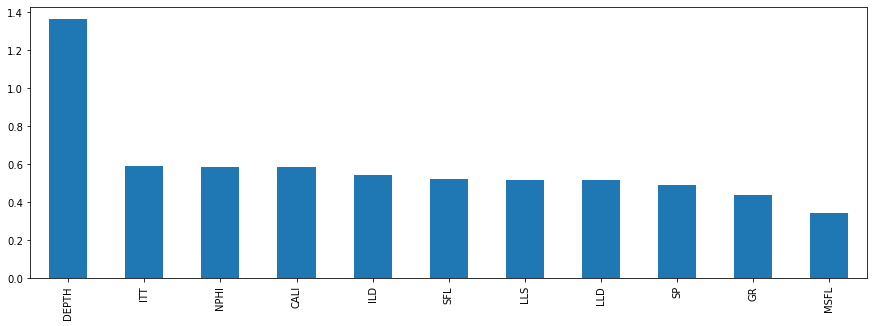

In [27]:
mutual_info.sort_values(ascending=False).plot.bar(figsize=(15,5))

In [32]:
from sklearn.feature_selection import SelectPercentile

## Selecting the top 20 percentile
selected_top_columns = SelectPercentile(mutual_info_regression, percentile=40)
selected_top_columns.fit(mutual_X, mutual_Y)


SelectPercentile(percentile=40,
                 score_func=<function mutual_info_regression at 0x0000020BBEB901F0>)

In [33]:
selected_top_columns.get_support()

array([ True,  True, False, False,  True, False, False, False,  True,
       False, False])

In [34]:
mutual_X.columns[selected_top_columns.get_support()]

Index(['DEPTH', 'CALI', 'ITT', 'NPHI'], dtype='object')

##### Difference Between Information Gain And Mutual Information
I(X ; Y) = H(X) – H(X | Y) and IG(S, a) = H(S) – H(S | a)

As such, mutual information is sometimes used as a synonym for information gain. Technically, they calculate the same quantity if applied to the same data.

### Dispersion Ratio

In [ ]:
X=X+1 i

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2


X_new =` SelectKBest(k=5, score_func=chi2).fit_transform(df_norm, label)

### Fisher’s Score


In [ ]:
import scipy.stats as stats

# obs = np.array([[1,5], [8,2]])
fish_dat=dataset1.copy()
fisher_result = stats.fisher_exact(fish_dat['NPHI', 'RHOB'])

p_val = fisher_result[1]

# print ('Data:')
# print (obs)

print ('\nProbability that column does not effect row values:')
print (p_val)

# Feature Selection Using a Wrapper

In [35]:
# boston = pd.DataFrame(boston_data.data, columns=boston_data.feature_names)
# boston['MEDV'] = boston_data.target
# boston['RAD'] = boston['RAD'].astype('category')
# dummies = pd.get_dummies(boston.RAD)
# boston = boston.drop(columns='RAD').merge(dummies,left_index=True,right_index=True)
Wrapper_X = dataset1.drop(columns='RHOB')

Wrapper_y = dataset1.RHOB

In [36]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import KFold
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_predict
from sklearn.linear_model import LinearRegression
from math import sqrt



cv = KFold(n_splits=10, random_state=0, shuffle=False)
classifier_pipeline = make_pipeline(StandardScaler(), KNeighborsRegressor(n_neighbors=10))
y_pred = cross_val_predict(classifier_pipeline, Wrapper_X, Wrapper_y, cv=cv)
print("RMSE: " + str(round(sqrt(mean_squared_error(Wrapper_y,y_pred)),2)))
print("R_squared: " + str(round(r2_score(Wrapper_y,y_pred),2)))

D:\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


RMSE: 0.07
R_squared: 0.61


## 1 Forward Feature elemination

In [37]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

ffs1 = SFS(classifier_pipeline, 
           k_features='best', 
           forward=True, 
           scoring='neg_mean_squared_error',
           cv=cv,
           n_jobs=1,
           
          )

# X = boston.drop(columns='MEDV')

ffs1.fit(Wrapper_X,Wrapper_y)

ffs1.subsets_

{1: {'feature_idx': (4,),
  'cv_scores': array([-0.0101957 , -0.01195956, -0.00763884, -0.00490327, -0.00412622,
         -0.00413075, -0.00485519, -0.00568748, -0.00788722, -0.00827133]),
  'avg_score': -0.006965555802868811,
  'feature_names': ('ITT',)},
 2: {'feature_idx': (2, 4),
  'cv_scores': array([-0.01053435, -0.00597853, -0.00525397, -0.00236496, -0.00372229,
         -0.00391599, -0.00471364, -0.00471388, -0.00721817, -0.00655482]),
  'avg_score': -0.005497061000156098,
  'feature_names': ('GR', 'ITT')},
 3: {'feature_idx': (2, 4, 7),
  'cv_scores': array([-0.01061388, -0.00740069, -0.00394346, -0.00246429, -0.00439165,
         -0.00233389, -0.00367036, -0.00493059, -0.00511562, -0.00565612]),
  'avg_score': -0.0050520545146053066,
  'feature_names': ('GR', 'ITT', 'MSFL')},
 4: {'feature_idx': (2, 3, 4, 7),
  'cv_scores': array([-0.01076678, -0.00771993, -0.00319081, -0.00164125, -0.00415392,
         -0.00262813, -0.0036291 , -0.00529442, -0.00480907, -0.0059626 ]),
  'avg

In [41]:
feat_cols=list(ffs1.k_feature_idx_)
print(ffs1.k_score_)
print(feat_cols)
print(Wrapper_X.columns)

-0.004979601644341223
[2, 3, 4, 7]
Index(['DEPTH', 'CALI', 'GR', 'ILD', 'ITT', 'LLD', 'LLS', 'MSFL', 'NPHI',
       'SFL', 'SP'],
      dtype='object')


In [ ]:

# import sklearn
# sklearn.metrics.SCORERS.keys()

### 2 Backward Feature elimination

In [39]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

bfs = SFS(classifier_pipeline, 
           k_features='best', 
           forward=False, 
           scoring='neg_mean_squared_error',
           cv=cv,
           n_jobs=1,
           
          )

bfs.fit(Wrapper_X,Wrapper_y)




SequentialFeatureSelector(cv=KFold(n_splits=10, random_state=0, shuffle=False),
                          estimator=Pipeline(steps=[('standardscaler',
                                                     StandardScaler()),
                                                    ('kneighborsregressor',
                                                     KNeighborsRegressor(n_neighbors=10))]),
                          forward=False, k_features='best',
                          scoring='neg_mean_squared_error')

In [40]:
# dir(bfs)
print(bfs.k_score_)
#  'k_feature_idx_',
print(bfs.k_feature_names_)

feat_cols=list(bfs.k_feature_idx_)
print(feat_cols)
print(Wrapper_X.columns)

-0.004894853864598333
('DEPTH', 'ILD', 'ITT', 'MSFL', 'NPHI', 'SP')
[0, 3, 4, 7, 8, 10]
Index(['DEPTH', 'CALI', 'GR', 'ILD', 'ITT', 'LLD', 'LLS', 'MSFL', 'NPHI',
       'SFL', 'SP'],
      dtype='object')


### 3 Exhaustive Feature Selection

In [42]:
from mlxtend.feature_selection import ExhaustiveFeatureSelector as EFS

# import the algorithm you want to evaluate on your features
from sklearn.ensemble import RandomForestClassifier

#create the exhaustiveFeatureSellector object.
efs = EFS(RandomForestClassifier(),
         min_features=4,
         max_features=8,
         scoring='roc_auc',
         cv=cv)

efs2= EFS(classifier_pipeline, 
#            k_features='best', 
#            forward=False, 
           scoring='neg_mean_squared_error',
           cv=cv,
           n_jobs=1,
           
          )

# fit to object to the training data
efs2 =efs2.fit(Wrapper_X,Wrapper_y)

#print the selected features
selected_features= Wrapper_X.columns[list(efs2.best_idx_)]
print(selected_features)


Features: 11/11

Index(['ITT'], dtype='object')


In [44]:
print(efs2.k_score_)
#  'k_feature_idx_',
print(efs.k_feature_names_)

# feat_cols=list(bfs.k_feature_idx_)
# print(feat_cols)
# print(Wrapper_X.columns)
# efs2.best_score_

AttributeError: 'ExhaustiveFeatureSelector' object has no attribute 'k_score_'

### embeded methods


### Lasso regularization

In [45]:
embeded_X = dataset1.drop(columns='RHOB')
embeded_y = dataset1.RHOB

In [46]:
from sklearn.linear_model import LassoCV
reg = LassoCV()
reg.fit(embeded_X,embeded_y )
print("Best alpha using built-in LassoCV:%f" % reg.alpha_)
print("Best score using built-in LassoCV:%f" % reg.score(embeded_X ,embeded_y ))
coef =pd.Series(reg.coef_, index = embeded_X.columns)


Best alpha using built-in LassoCV:0.046020
Best score using built-in LassoCV:0.597732


In [47]:
print('Lasso picked '+ str(sum(coef != 0)) + "variables and eliminated the other "+ str(sum(coef== 0)) +"variables")



Lasso picked 4variables and eliminated the other 7variables


Text(0.5, 1.0, 'Feature importance using Lasso Model')

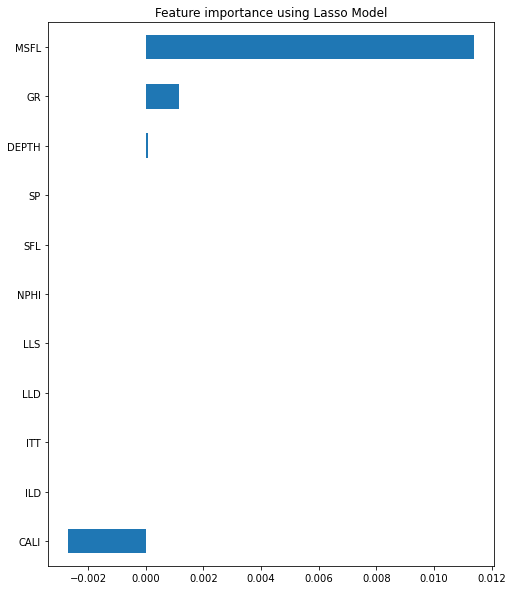

In [48]:
imp_coef = coef.sort_values()
import matplotlib
matplotlib.rcParams['figure.figsize'] = (8.0, 10.0)
imp_coef.plot(kind = 'barh')
plt.title("Feature importance using Lasso Model")

### Random Forest importance

In [ ]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=340)

model.fit(embeded_X,embeded_y)

importances = pd.DataFrame({"Features": pd.DataFrame(embeded_X).columns, "importances":importances})
final_df.set_index('importances')

final_df= final_df.sort_values('Importance')

final_df.plot.bar(color = 'teal')

In [54]:
# for regression
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression

rf = RandomForestRegressor(n_estimators=100)
rf.fit(embeded_X,embeded_y)



RandomForestRegressor()

In [55]:
rf.feature_importances_



array([0.66456376, 0.03806616, 0.01448592, 0.00990156, 0.01705524,
       0.00810221, 0.00754762, 0.09715014, 0.10047663, 0.00751524,
       0.03513552])

<BarContainer object of 11 artists>

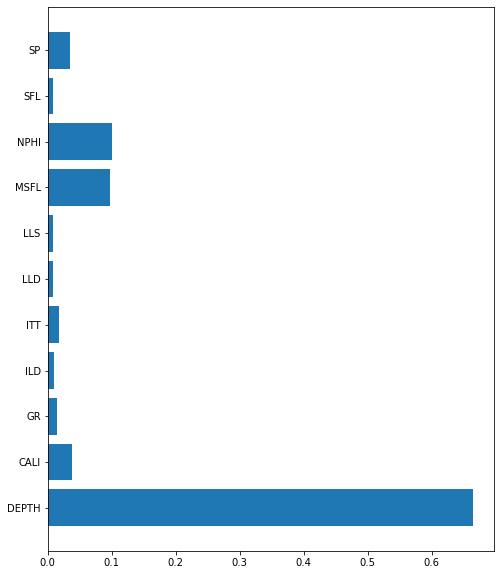

In [59]:

forest_columns=['DEPTH',
 'CALI',
 'GR',
 'ILD',
 'ITT',
 'LLD',
 'LLS',
 'MSFL',
 'NPHI',
 'SFL',
 'SP']
plt.barh(forest_columns, rf.feature_importances_)

In [60]:
# wants to rearrange it to in decrease order
sorted_idx = rf.feature_importances_.argsort()
plt.barh(forest_columns[sorted_idx], rf.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")


TypeError: only integer scalar arrays can be converted to a scalar index

# Feature extraction

In [ ]:
from IPython.display import Image
Image(filename='./images/interactions.jpg')

In [ ]:
# feature extraction 

# Use PolynomialFeatures in sklearn.preprocessing to create two-way interactions for all features
from itertools import combinations
from sklearn.preprocessing import PolynomialFeatures

def add_interactions(df):
    # Get feature names
    combos = list(combinations(list(df.columns), 2))
    colnames = list(df.columns) + ['_'.join(x) for x in combos]
    
    # Find interactions
    poly = PolynomialFeatures(interaction_only=True, include_bias=False)
    df = poly.fit_transform(df)
    df = pd.DataFrame(df)
    df.columns = colnames
    
    # Remove interaction terms with all 0 values            
    noint_indicies = [i for i, x in enumerate(list((df == 0).all())) if x]
    df = df.drop(df.columns[noint_indicies], axis=1)
    
    return df



In [ ]:
dataset1_iteracts = add_interactions(pd_data1_Sd)
print(dataset1_iteracts.head(5))

# Dimensionality reduction using PCA
Principal component analysis (PCA) is a technique that transforms a dataset of many features into principal components that "summarize" the variance that underlies the data
Each principal component is calculated by finding the linear combination of features that maximizes variance, while also ensuring zero correlation with the previously calculated principal components

In [ ]:
from IPython.display import Image
Image(filename='./images/pca.jpg')
# Imagine taken from: 
# http://www.mathworks.com/help/stats/quality-of-life-in-u-s-cities.html?requestedDomain=www.mathworks.com

In [ ]:
# Use PCA from sklearn.decompostion to find principal components
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca_np=pca.fit_transform(dataset1_iteracts)
X_pca = pd.DataFrame(pca.fit_transform(dataset1_iteracts))

print(X_pca.head(5))

principalDf = pd.DataFrame(data =X_pca_np 
             , columns = ['principal component 1', 'principal component 2'])
principalDf

In [ ]:
finalDf = pd.concat([principalDf, dataset1[['RHOB']]], axis = 1)
finalDf

In [ ]:
dataset1["RHOB"]

In [ ]:
fig, ax = plt.subplots()
plt.scatter(finalDf[ 'principal component 1']
               , finalDf[ 'principal component 2']
              , c=dataset1['RHOB'], cmap='inferno', alpha=0.7)
plt.xlabel('Principal Component 1', fontsize = 15)
plt.ylabel('Principal Component 2', fontsize = 15)
plt.title('2 component PCA', fontsize = 20)

# plt.colorbar()
cbar = plt.colorbar()
cbar.set_label('RHOB')
plt.grid('on')


In [ ]:
# X_pca

# plt.figure(figsize=(8,6))
# plt.scatter(X_pca[:,0],X_pca[:,1],c=dataset1['RHOB'])
# plt.xlabel('First principle component')
# plt.ylabel('Second principle component')


fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot() 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)

color = dataset1["RHOB"]
ax.scatter(finalDf[ 'principal component 1']
               , finalDf[ 'principal component 2']
               , c = color
#                , s = 50
               ,alpha =0.7
               ,cmap = 'RdPu'
          )

cbar = plt.colorbar()
cbar.set_label('Color Intensity')
# plt.grid('on')

# psm = ax.pcolormesh(dataset1['RHOB'], cmap='inferno', rasterized=True,
# #                             vmin=-4, vmax=4
#                            )
# fig.colorbar(psm, ax=ax)

# ax.legend(targets)
ax.grid()


# add target colour map

### pca and selecting K values

In [9]:
# import plotly.express as px
import seaborn as sn

%matplotlib inline

import plotly.io as pio
pio.renderers.default = 'browser'

In [10]:
pd_data1_Sd
DR=pd_data1_Sd.copy()
DR_X= pd_data1_Sd.drop('RHOB', 1)
DR_X
DR_Y= pd_data1_Sd.RHOB
DR_Y

0       -1.520406
1       -1.418822
2       -1.417071
3       -1.454727
4       -1.481874
           ...   
13852    0.924172
13853    0.921107
13854    0.918042
13855    0.914977
13856    0.984159
Name: RHOB, Length: 13857, dtype: float64

### Step-2 : Computing Covariance Matrix
* N-dimensional dataset always gives a N*N order Covariance Matrix.
* If both variables tend to increase or decrease together, the coefficient is positive.
* If one variable tends to increase as the other decreases, the coefficient is negative.

In [11]:
def computeCovarianceMatrix(data):
    len_data = data.shape[0]
    covariance = data.T.dot(data)/len_data
    return covariance

cov_mat = computeCovarianceMatrix(DR_X)   # or scaled_df.cov()
cov_mat = np.around(cov_mat,3)
cov_mat

,DEPTH,CALI,GR,ILD,ITT,LLD,LLS,MSFL,NPHI,SFL,SP
DEPTH,1.000,-0.377,0.847,0.023,-0.622,-0.037,0.012,0.005,-0.578,0.004,0.109
CALI,-0.377,1.000,-0.214,-0.434,0.675,-0.377,-0.401,-0.470,0.641,-0.382,0.126
GR,0.847,-0.214,1.000,-0.186,-0.466,-0.205,-0.142,-0.160,-0.349,-0.159,0.163
ILD,0.023,-0.434,-0.186,1.000,-0.553,0.946,0.935,0.822,-0.632,0.949,-0.195
ITT,-0.622,0.675,-0.466,-0.553,1.000,-0.480,-0.506,-0.477,0.897,-0.490,0.057
LLD,-0.037,-0.377,-0.205,0.946,-0.480,1.000,0.979,0.818,-0.567,0.959,-0.224
LLS,0.012,-0.401,-0.142,0.935,-0.506,0.979,1.000,0.853,-0.587,0.972,-0.224
MSFL,0.005,-0.470,-0.160,0.822,-0.477,0.818,0.853,1.000,-0.570,0.849,-0.230
NPHI,-0.578,0.641,-0.349,-0.632,0.897,-0.567,-0.587,-0.570,1.000,-0.572,0.091
SFL,0.004,-0.382,-0.159,0.949,-0.490,0.959,0.972,0.849,-0.572,1.000,-0.214


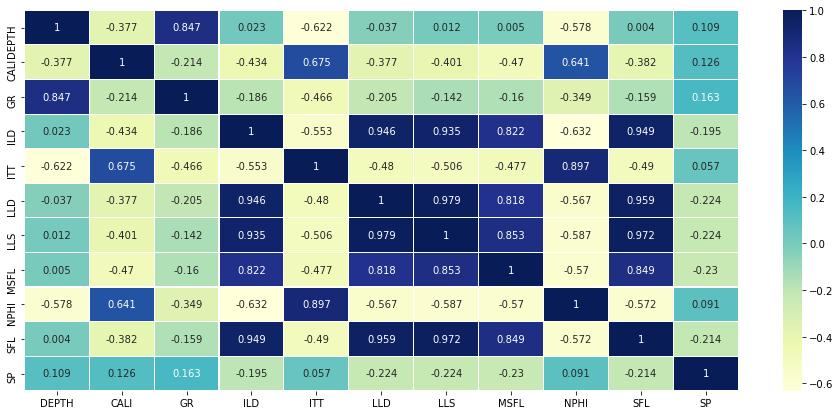

In [12]:
'''Now, Plotting the Covariance Matrix as Heatmap'''

fig = plt.figure(figsize=(16,7))
'''Annotate each cell with the numeric value using integer formatting'''
sn.heatmap(cov_mat, annot=True, fmt='g', linewidths=.1, cmap="YlGnBu")    
plt.show()

### Step-3 : Eigen Decomposition of Covariance Matrix
* NxN order covariance matrix gives "N" eigen vectors and their corresponding "N" eigen values.
* We already know that each PC has two things : 1.) Eigenvector : tells the direction of the PC (or, direction in which the data is dispersed). 2.) Eigenvalues : gives variances explained by each PC and their relative importance. (Higher the eigenvalue, more the variation captured & hence more significant that PC is.)Step-3 : Eigen Decomposition of Covariance Matrix
NxN order covariance matrix gives "N" eigen vectors and their corresponding "N" eigen values.
We already know that each PC has two things : 1.) Eigenvector : tells the direction of the PC (or, direction in which the data is dispersed). 2.) Eigenvalues : gives variances explained by each PC and their relative importance. (Higher the eigenvalue, more the variation captured & hence more significant that PC is.)

In [13]:
# from numpy.linalg import eig
eig_values, eig_vectors = np.linalg.eig(cov_mat)
print('\nNumber of Eigenvectors : %s ' %len(eig_vectors))
print('\nEigenvectors : \n\n%s' %eig_vectors)
print('\nEigenvalues : \n\n%s' %eig_values)


Number of Eigenvectors : 11 

Eigenvectors : 

[[ 9.80473085e-02 -5.48983204e-01 -1.30089961e-02 -2.72494586e-01
   1.13073190e-01 -2.54512807e-02 -6.80634777e-01  2.91817172e-01
  -2.29615887e-01  1.96862822e-03 -1.67427436e-04]
 [-2.55448994e-01  2.28256270e-01  2.09077561e-01 -7.64736576e-01
  -4.06904156e-01 -2.76977119e-01  6.77755102e-02  7.73130275e-02
  -3.13073440e-02  1.53505956e-02  5.95802796e-03]
 [ 1.17155279e-02 -5.44767359e-01  1.36091803e-02 -4.01936938e-01
   4.06473103e-01  8.35010526e-02  4.67023057e-01 -2.36302304e-01
   2.90801122e-01  9.94320678e-02 -2.75428013e-02]
 [ 3.85258686e-01  1.45725050e-01  1.08635059e-01 -6.55640829e-02
  -1.15672954e-01  2.04180842e-01 -1.46005335e-01  3.46223885e-01
   6.83709886e-01  3.36824294e-01  1.92539170e-01]
 [-3.04681749e-01  3.45920734e-01  3.58608141e-02 -1.23272619e-01
   4.36457738e-01  2.03895524e-03 -5.06164814e-01 -4.99495712e-01
   2.67842049e-01  5.33237126e-02  1.56416000e-02]
 [ 3.78013199e-01  1.87897687e-01  1.

#### Visualize above eigenvectors as a dataframe (or coefficient matrix)
* Each PC is a linear combination of all the original variables or attributes : image.png - X_i are the original variables, and - Beta_i are the corresponding weights or so called PCA coefficients.
* Original Variables : 'fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol'
* The first row is the coefficients that generated the first PC. - PC1 = (fixed acidity 0.489314) + (volatile acidity -0.238584) + …....... + (alcohol * -0.113232) - Similary PC2 and so on.....

In [14]:
eigenvec_df = pd.DataFrame(eig_vectors) 
eigenvec_df.columns = ['eigvec_'+str(i+1) for i in range(0, len(eig_vectors))]
eigenvec_df.T

,0,1,2,3,4,5,6,7,8,9,10
eigvec_1,0.098047,-0.255449,0.011716,0.385259,-0.304682,0.378013,0.384748,0.358873,-0.330299,0.381290,-0.097704
eigvec_2,-0.548983,0.228256,-0.544767,0.145725,0.345921,0.187898,0.159732,0.138752,0.281556,0.168673,-0.145092
eigvec_3,-0.013009,0.209078,0.013609,0.108635,0.035861,0.102093,0.096280,0.018490,0.024105,0.111417,0.953842
eigvec_4,-0.272495,-0.764737,-0.401937,-0.065564,-0.123273,-0.155377,-0.180726,0.051753,-0.086667,-0.188118,0.239780
eigvec_5,0.113073,-0.406904,0.406473,-0.115673,0.436458,0.017062,0.137131,0.363733,0.533663,0.124067,0.031002
eigvec_6,-0.025451,-0.276977,0.083501,0.204181,0.002039,0.286557,0.164282,-0.824248,0.249639,0.150951,-0.019374
eigvec_7,-0.680635,0.067776,0.467023,-0.146005,-0.506165,-0.006437,0.059329,0.064957,0.168198,-0.020686,-0.003537
eigvec_8,0.291817,0.077313,-0.236302,0.346224,-0.499496,-0.184277,-0.201403,0.120038,0.626359,0.047039,-0.013845
eigvec_9,-0.229616,-0.031307,0.290801,0.683710,0.267842,-0.343253,-0.391805,-0.009403,-0.179623,0.135313,-0.023153
eigvec_10,0.001969,0.015351,0.099432,0.336824,0.053324,0.468721,-0.020195,0.119408,0.059353,-0.797293,-0.003938


### Step-4 : Sort the eigenvalues in descending order


In [15]:
indexes = eig_values.argsort()[::-1]   
eig_values = eig_values[indexes] 
eig_vectors = eig_vectors[:, indexes]
sorted_eig_pairs = [(np.around(np.abs(eig_values[i]),3), eig_vectors[:,i]) for i in range(len(eig_values))]
print('\nSorted Eigen-pairs (descending order) :\n')

sorted_eigenValues = []
for i in range(0, len(sorted_eig_pairs)):
    print("eigenvec_{0} : {1}".format(str(i+1), str(sorted_eig_pairs[i][0])))
    sorted_eigenValues.append(sorted_eig_pairs[i][0])
    
print("\nTotal Variance (sum of all eigenvalues) : ", round(sum(sorted_eigenValues), 3))


Sorted Eigen-pairs (descending order) :

eigenvec_1 : 5.883
eigenvec_2 : 2.715
eigenvec_3 : 0.935
eigenvec_4 : 0.624
eigenvec_5 : 0.308
eigenvec_6 : 0.213
eigenvec_7 : 0.14
eigenvec_8 : 0.078
eigenvec_9 : 0.055
eigenvec_10 : 0.034
eigenvec_11 : 0.013

Total Variance (sum of all eigenvalues) :  10.998


## Step-5 : Decide the value of "K" (optimal no. of PCs)
* PCs are the eigenvectors of a covariance matrix,

### Method-1 : Kaiser’s Stopping Rule
* Simply Choose all PCs whose Eigenvalues are greater than 1.

In [16]:
best_eig_pairs = [sorted_eig_pairs[i][0] for i in range(0, len(sorted_eig_pairs)) if sorted_eig_pairs[i][0] > 1.0]
print("\nAccording to Kaiser's Stopping Rule :")
print("Number of PCs to be considered for PCA is : {}".format(str(len(best_eig_pairs))))
print("Their Eigenvalues are : {}".format(str(best_eig_pairs)))


According to Kaiser's Stopping Rule :
Number of PCs to be considered for PCA is : 2
Their Eigenvalues are : [5.883, 2.715]


### Method-2 : Scree Plot
* We plot a graph b/w PCs Number (X-axis) and its captured Variance or eigenvalues (Y-axis).
* And then we pick the K-value (number of components) where the slope starts flattening.

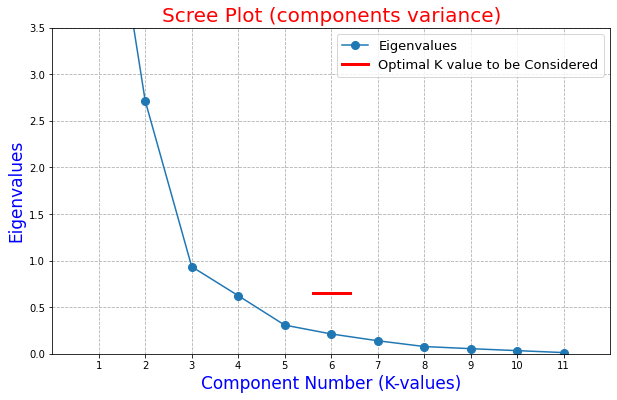

In [17]:
fig = plt.figure(figsize=(10, 6))
plt.title("Scree Plot (components variance)", color='Red', fontsize=20)
plt.xticks(np.arange(1, 12, 1))
plt.xlim(0, 12)
plt.ylim(0, 3.5)
plt.ylabel("Eigenvalues", fontsize=17, color='blue')
plt.xlabel("Component Number (K-values)", fontsize=17, color='blue')
plt.grid(linestyle='--')
plt.plot(range(1, 12), sorted_eigenValues, linestyle='-', label="Eigenvalues", marker='o', markersize=8)
plt.plot([5.6, 6.4], [0.65, 0.65], color='red', linestyle='-', lw=3, label="Optimal K value to be Considered")
plt.legend(loc=1, prop={'size': 13})

### Method-3 : Cumulative Variance Plot
* To find the variance explained by each component : We should divide each component’s eigenvalue by the sum of all eigenvalues.

* To find the cumulative variance explained by a component C3 : We should add the variance explained by components (C1, C2, C3). image.png

In [18]:
cumulative_variance = {}
ith_cumulative_variance = 0
for i in range(0, len(sorted_eig_pairs)):
    ith_explained_variance = sorted_eig_pairs[i][0]/sum(sorted_eigenValues)
    # print(ith_explained_variance)
    ith_cumulative_variance += ith_explained_variance
    cumulative_variance[str(i+1)] = round(ith_cumulative_variance*100, 3)

print("\nCumulative Variance Percentage : ")
cumulative_variance


Cumulative Variance Percentage : 


{'1': 53.492,
 '2': 78.178,
 '3': 86.679,
 '4': 92.353,
 '5': 95.154,
 '6': 97.09,
 '7': 98.363,
 '8': 99.073,
 '9': 99.573,
 '10': 99.882,
 '11': 100.0}

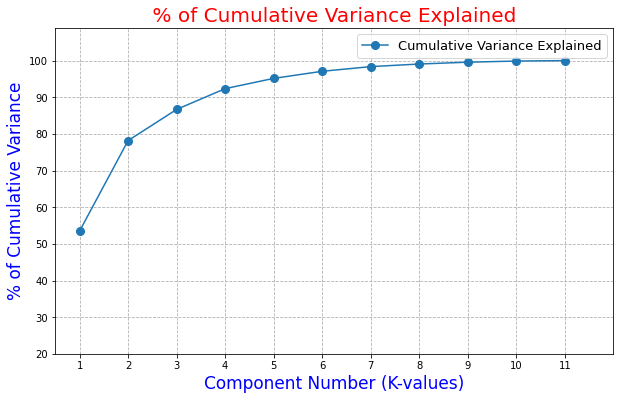

In [19]:
fig = plt.figure(figsize=(10, 6))
plt.title(" % of Cumulative Variance Explained ", color='Red', fontsize=20)
plt.xticks(np.arange(1, 12, 1))
plt.xlim(0.5, 12)
plt.ylim(20, 109) #0.2, 1.2)
plt.ylabel("% of Cumulative Variance", fontsize=17, color='blue')
plt.xlabel("Component Number (K-values)", fontsize=17, color='blue')
plt.grid(linestyle='--')
plt.plot(range(1, 12),sorted(cumulative_variance.values()), linestyle='-', label="Cumulative Variance Explained", marker='o', markersize=8)
# plt.plot([5.6, 6.4], [0.65, 0.65], color='red', linestyle='-', lw=3, label="Optimal K value to be Considered")
plt.legend(loc=1, prop={'size': 13})

### Step-6 : Projection matrix construction
* Based on decided "K" value, the "K" number of eigen vectors placed together will give us Projection matrix.(Pm)

In [20]:
K = 3
projection_matrix = np.array([list(np.hstack(i[1].reshape(11,1))) for i in sorted_eig_pairs[:]])
projection_matrix = projection_matrix[:K]
print("\nProjection-Matrix Dimension ... ", projection_matrix.shape)
projection_matrix


Projection-Matrix Dimension ...  (3, 11)


array([[ 0.09804731, -0.25544899,  0.01171553,  0.38525869, -0.30468175,
         0.3780132 ,  0.3847476 ,  0.3588731 , -0.33029893,  0.38129005,
        -0.09770353],
       [-0.5489832 ,  0.22825627, -0.54476736,  0.14572505,  0.34592073,
         0.18789769,  0.15973221,  0.13875181,  0.28155625,  0.1686731 ,
        -0.14509162],
       [-0.013009  ,  0.20907756,  0.01360918,  0.10863506,  0.03586081,
         0.10209344,  0.09627961,  0.01849046,  0.02410485,  0.11141667,
         0.95384229]])

## Projection Matrix as Dataframe
Each PC in Projection Matrox depicts an axis of new feature space where we would be projecting our original dataset.

In [21]:
projection_matrix_df = pd.DataFrame(projection_matrix) 
projection_matrix_df.columns = [str(i+1) for i in range(0, len(eig_vectors))]
projection_matrix_df = projection_matrix_df.set_index([pd.Index(['PC1', 'PC2', 'PC3'])])#, 'PC4', 'PC5', 'PC6'
projection_matrix_df

,1,2,3,4,5,6,7,8,9,10,11
PC1,0.098047,-0.255449,0.011716,0.385259,-0.304682,0.378013,0.384748,0.358873,-0.330299,0.381290,-0.097704
PC2,-0.548983,0.228256,-0.544767,0.145725,0.345921,0.187898,0.159732,0.138752,0.281556,0.168673,-0.145092
PC3,-0.013009,0.209078,0.013609,0.108635,0.035861,0.102093,0.096280,0.018490,0.024105,0.111417,0.953842


## Step-7 : Transformation of original dataset to new feature space
* We will transform "N" dimensional orginal dataset "X" to project it into new feature space "Y".
* This will be done using projection matrix "Pm" obtained above.
* Formula :  Y= X  ∗ (Pm)
* Transformed Data = Feature matrix( or Original dataset) * top k eigenvectors

In [22]:
DR_X.shape
transformedData = (DR_X).dot(projection_matrix.T)
transformedData.columns = ['PC'+str(i+1) for i in range(0, K)]
transformedData

,PC1,PC2,PC3
0,-3.398520,2.499091,0.178797
1,-3.403833,2.489971,0.105971
2,-3.451285,2.485884,0.033656
3,-3.515515,2.479439,-0.027975
4,-3.560541,2.492715,-0.047035
...,...,...,...
13852,0.962859,-2.179569,-2.287310
13853,0.938350,-2.179777,-2.362097
13854,0.894981,-2.185274,-2.387264
13855,0.858602,-2.230196,-2.407852


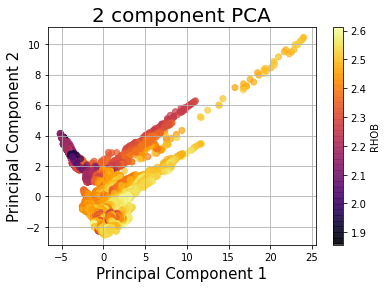

In [23]:
# two dimensions

fig, ax = plt.subplots()
plt.scatter(transformedData[ 'PC1']
               , transformedData[ 'PC2']
              , c=dataset1['RHOB'], cmap='inferno', alpha=0.7)
plt.xlabel('Principal Component 1', fontsize = 15)
plt.ylabel('Principal Component 2', fontsize = 15)
plt.title('2 component PCA', fontsize = 20)

# plt.colorbar()
cbar = plt.colorbar()
cbar.set_label('RHOB')
plt.grid('on')


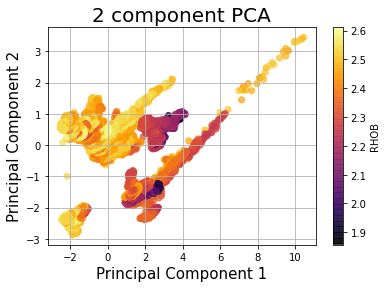

In [24]:
# two dimensions

fig, ax = plt.subplots()
plt.scatter(transformedData[ 'PC2']
               , transformedData[ 'PC3']
              , c=dataset1['RHOB'], cmap='inferno', alpha=0.7)
plt.xlabel('Principal Component 1', fontsize = 15)
plt.ylabel('Principal Component 2', fontsize = 15)
plt.title('2 component PCA', fontsize = 20)

# plt.colorbar()
cbar = plt.colorbar()
cbar.set_label('RHOB')
plt.grid('on')


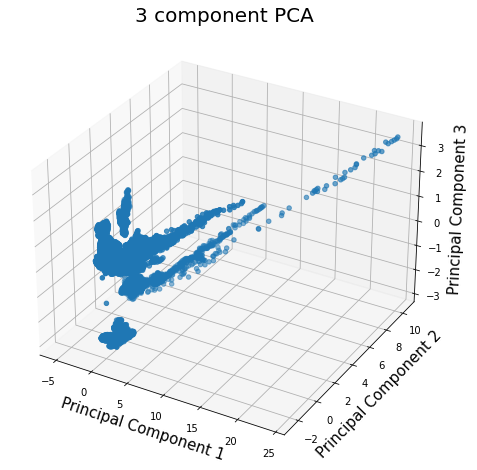

In [43]:
# for a 3 dimension

fig = plt.figure(figsize = (8,8))
ax = plt.axes(projection="3d")
# ax = fig.add_subplot() 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_zlabel('Principal Component 3', fontsize = 15)
ax.set_title('3 component PCA', fontsize = 20)
ax.scatter3D(transformedData[ 'PC1'],transformedData[ 'PC2'], transformedData[ 'PC3'], 'gray')
plt.show()

In [44]:
# datframe to excel
transformedData.to_excel('Feature_extracts.xlsx',sheet_name='PCAs')

In [36]:
vertical_concat = pd.concat([pd_data1_Sd['RHOB'], dataset1['RHOB']], axis=1)

vertical_concat.to_excel('Feature_targets.xlsx',sheet_name='RHOB')

In [34]:
# ExcelWriter can also be used to append to an existing Excel file:

# pd_data1_Sd['RHOB']
# to_target= dataset1['RHOB'].concatenat


to_target = pd_data1_Sd['RHOB'] + dataset1['RHOB']


# concatenating df1 and df2 along rows
vertical_concat = pd.concat([pd_data1_Sd['RHOB'], dataset1['RHOB']], axis=1)

# = pd.DataFrame(pd_data1_Sd['RHOB'], dataset1['RHOB'])

vertical_concat

with pd.ExcelWriter('Feature_extracts.xlsx',
                    mode='a') as writer:  
    vertical_concat.to_excel(#writer,
                             sheet_name='target' ,engine='xlsxwriter')

# dataset1['RHOB']

# pd_data1_Sd['RHOB']

ValueError: Append mode is not supported with xlsxwriter!

# Data selection
### Split the data into train and test

In [ ]:
# the 'sample' method takes a certain fraction randomly
#Note that we use `random_state` to ensure the reproducibility of the examples.
train_dataset = dataset.sample(frac=0.7, random_state=0)
test_dataset = dataset.drop(train_dataset.index)

In [ ]:
# Inspect the data
# Have a quick look at the joint distribution of a few pairs of columns from the training set.
# (   ) is a function of all the other parameters. Looking at the other rows it should be clear that they are functions of each other

sns.pairplot(train_dataset[column_names], diag_kind='kde')

In [ ]:
train_dataset.describe().transpose()

In [ ]:
Splitting the train and test data into input and target

In [ ]:

# split datat into input and target



train_input = train_dataset.copy()
test_input = test_dataset.copy()

train_target = train_input.pop('RHOB')
test_target = test_input.pop('RHOB')




In [ ]:

train_input.head()
# type(train_input)

In [ ]:
# let's invitigate the kde in the target and trainings

df_train = pd.DataFrame(train_target, columns=['RHOB'])
df_train['type'] = 'train'

df_test = pd.DataFrame(test_target, columns=['RHOB'])
df_test['type'] = 'test'

df_set = df_train.append(df_test)

_ = sns.displot(df_set, x="RHOB" ,hue="type", kind="kde", log_scale=False)

# auxillarys


In [ ]:
# open images in notebook
from IPython.display import Image
Image(filename ='./images/metricsFormulae.PNG')